# Capstone Project - Linear Regression 

This is data prep for Linear Regression capstone poject, done during *2021 Python for Machine Learning & Data Science Masterclass* course from udemy- link below:

https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/

----
## Overview
ssss

----
## Goal:
**sssss**

----
## Parts of project:
1. Understanding the background and data.
2. Exploring SalePrice (target).
3. Exploring dependent variables.
4. Data preprocessing and feature engineering.
5. Assumptions for testing.
6. Modeling

----
----

# 1. Understanding the background and data.

## Dataset description 

Usefull links:
- [Original paper](http://jse.amstat.org/v19n3/decock.pdf)
- [Original dataset](http://jse.amstat.org/v19n3/decock/AmesHousing.txt)
- [Documentation of the data](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)


Short description, [based from Kaggle:](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Loading the file with description**

In [1]:
with open('data/Ames_Housing_Feature_Description.txt','r') as f: 
    info = f.read()
    print(info)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Looking at the description we can assume that some features will have more impact on the **SalePrice**, then the another. So far, based only on thinking logically we can assume that:
* **OverallQual/OverallCond** will be important, as it measures the overall state and quality of house;
* **YearBuilt** in most cases will be important, because *usually* the newer the house is the higher the price is (there might be exceptions e.g. very old houses in a good state, almost like antiques);
* **GrLivArea** will be important as it describes the above ground living area (the square footage)

With that being said, we'll check that variables at first.

## Import libs, data quick description

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

sns.set_style('darkgrid')
# color for plots
color='darkslateblue'

In [3]:
# load dataset
AmesOriginal = pd.read_csv("data/Ames_Housing_Data.csv")

**Our target variable is <u>SalesPrice</u>.**

Basic info about the dataset below.

In [4]:
# shape - 2930 rows and 81 colums.
# names of columns - they are a bit messy, we will corect that in a moment.
# nulls -  we already see that some columns have a lot, different have less.
# data types - type of data in column(number of columns):
# float64(11), int64(27), object(43).
# first column PID - we may want to drop it or set it as an index
AmesOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [5]:
# before dropping ID, let's check if there are no duplicates
AmesOriginal[AmesOriginal.duplicated(subset=['PID'])]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [6]:
# if none, dropping PID
AmesDf = AmesOriginal.drop(columns='PID')

In [7]:
# list for new colnames
cols = []
for i in range(len(AmesDf.columns)):
    cols.append("".join(AmesDf.columns[i].split()))
# switching names
AmesDf.columns = cols
# seems fine
AmesDf.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'W

# 2. Exploring SalePrice (target).

In [9]:
# basic info about taget variable
# The mean house price is approx. 180 k and deviates from the average of 80k.
# The cheapest house cost almost 13k, and the most expensive one cost 755k.
# 25% of all houses has price lower than 129.5k
# 150k is the median, so half of houses cost less and the other half cost more.
# 75 % of all houses has price lower than 213.5k
AmesDf['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

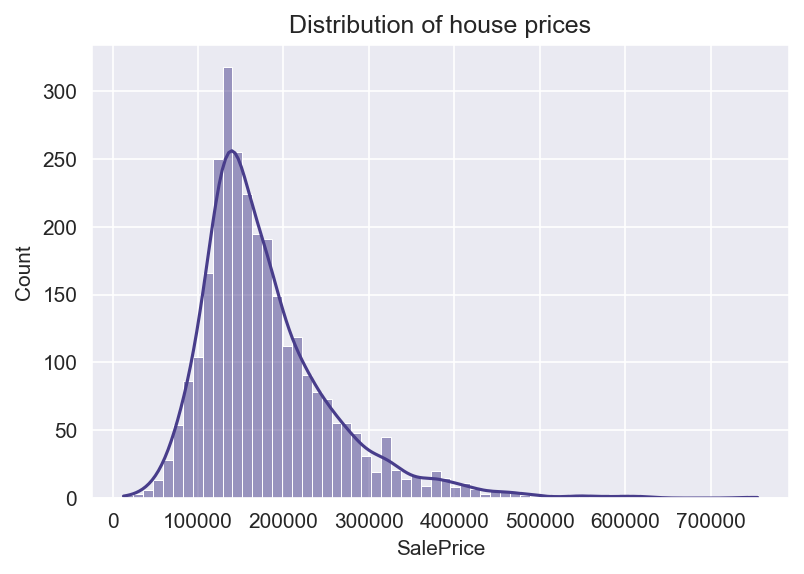

In [13]:
# lets plot the distribution
# the distribution is right-skewed with long tail, vast majority of houses cost below 400k.
plt.figure(dpi=150)
plt.title(" Distribution of house prices ")
sns.histplot(data=AmesDf, x='SalePrice', kde=True, color=color);

In [14]:
# check skewness - positive (we'll check skewness of features later, so we can transform the data)
AmesDf['SalePrice'].skew()

1.7435000757376466

In [15]:
# and kurtosis
AmesDf['SalePrice'].kurt()

5.118899951130896

In [16]:
# quick check
l = len(AmesDf[AmesDf['SalePrice']>400000])
print(f'Number of houses with price over 400k : {l}')
print(f'Percentage of that houses overall: {round(l/len(AmesDf)*100,2)}%')

Number of houses with price over 400k : 64
Percentage of that houses overall: 2.18%


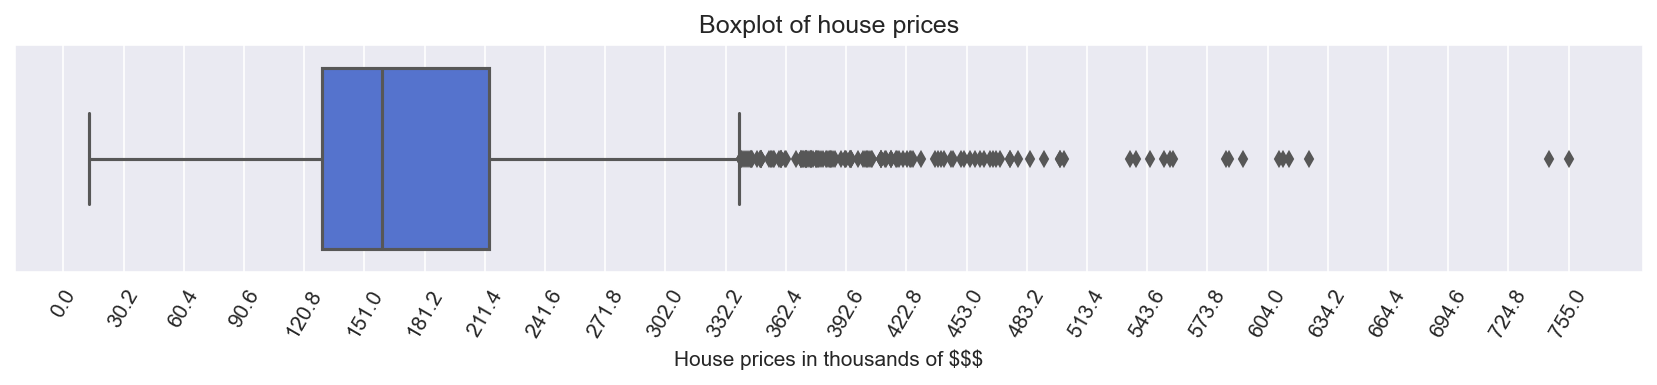

In [17]:
# boxplot to check the outliers designated by Q1 - 1.5xIQR and Q3 + 1.5xIQR 
# figure and ticks
plt.figure(figsize=(14,2), dpi=150)
tks = np.linspace(0,max(AmesDf['SalePrice']),26)
# plot itself
sns.boxplot(data=AmesDf, x='SalePrice', color='royalblue')
plt.xlabel("House prices in thousands of $$$")
plt.title(" Boxplot of house prices ")
plt.xticks(ticks = tks, labels=tks/1000, rotation=60);

# we see that there may be many outliers, based on 1.5 x IQR 
# Especially there are 2 points near the 750k price


**Now we'll check the relation between 4 feats we picked earlier and labeled as potentially important.**

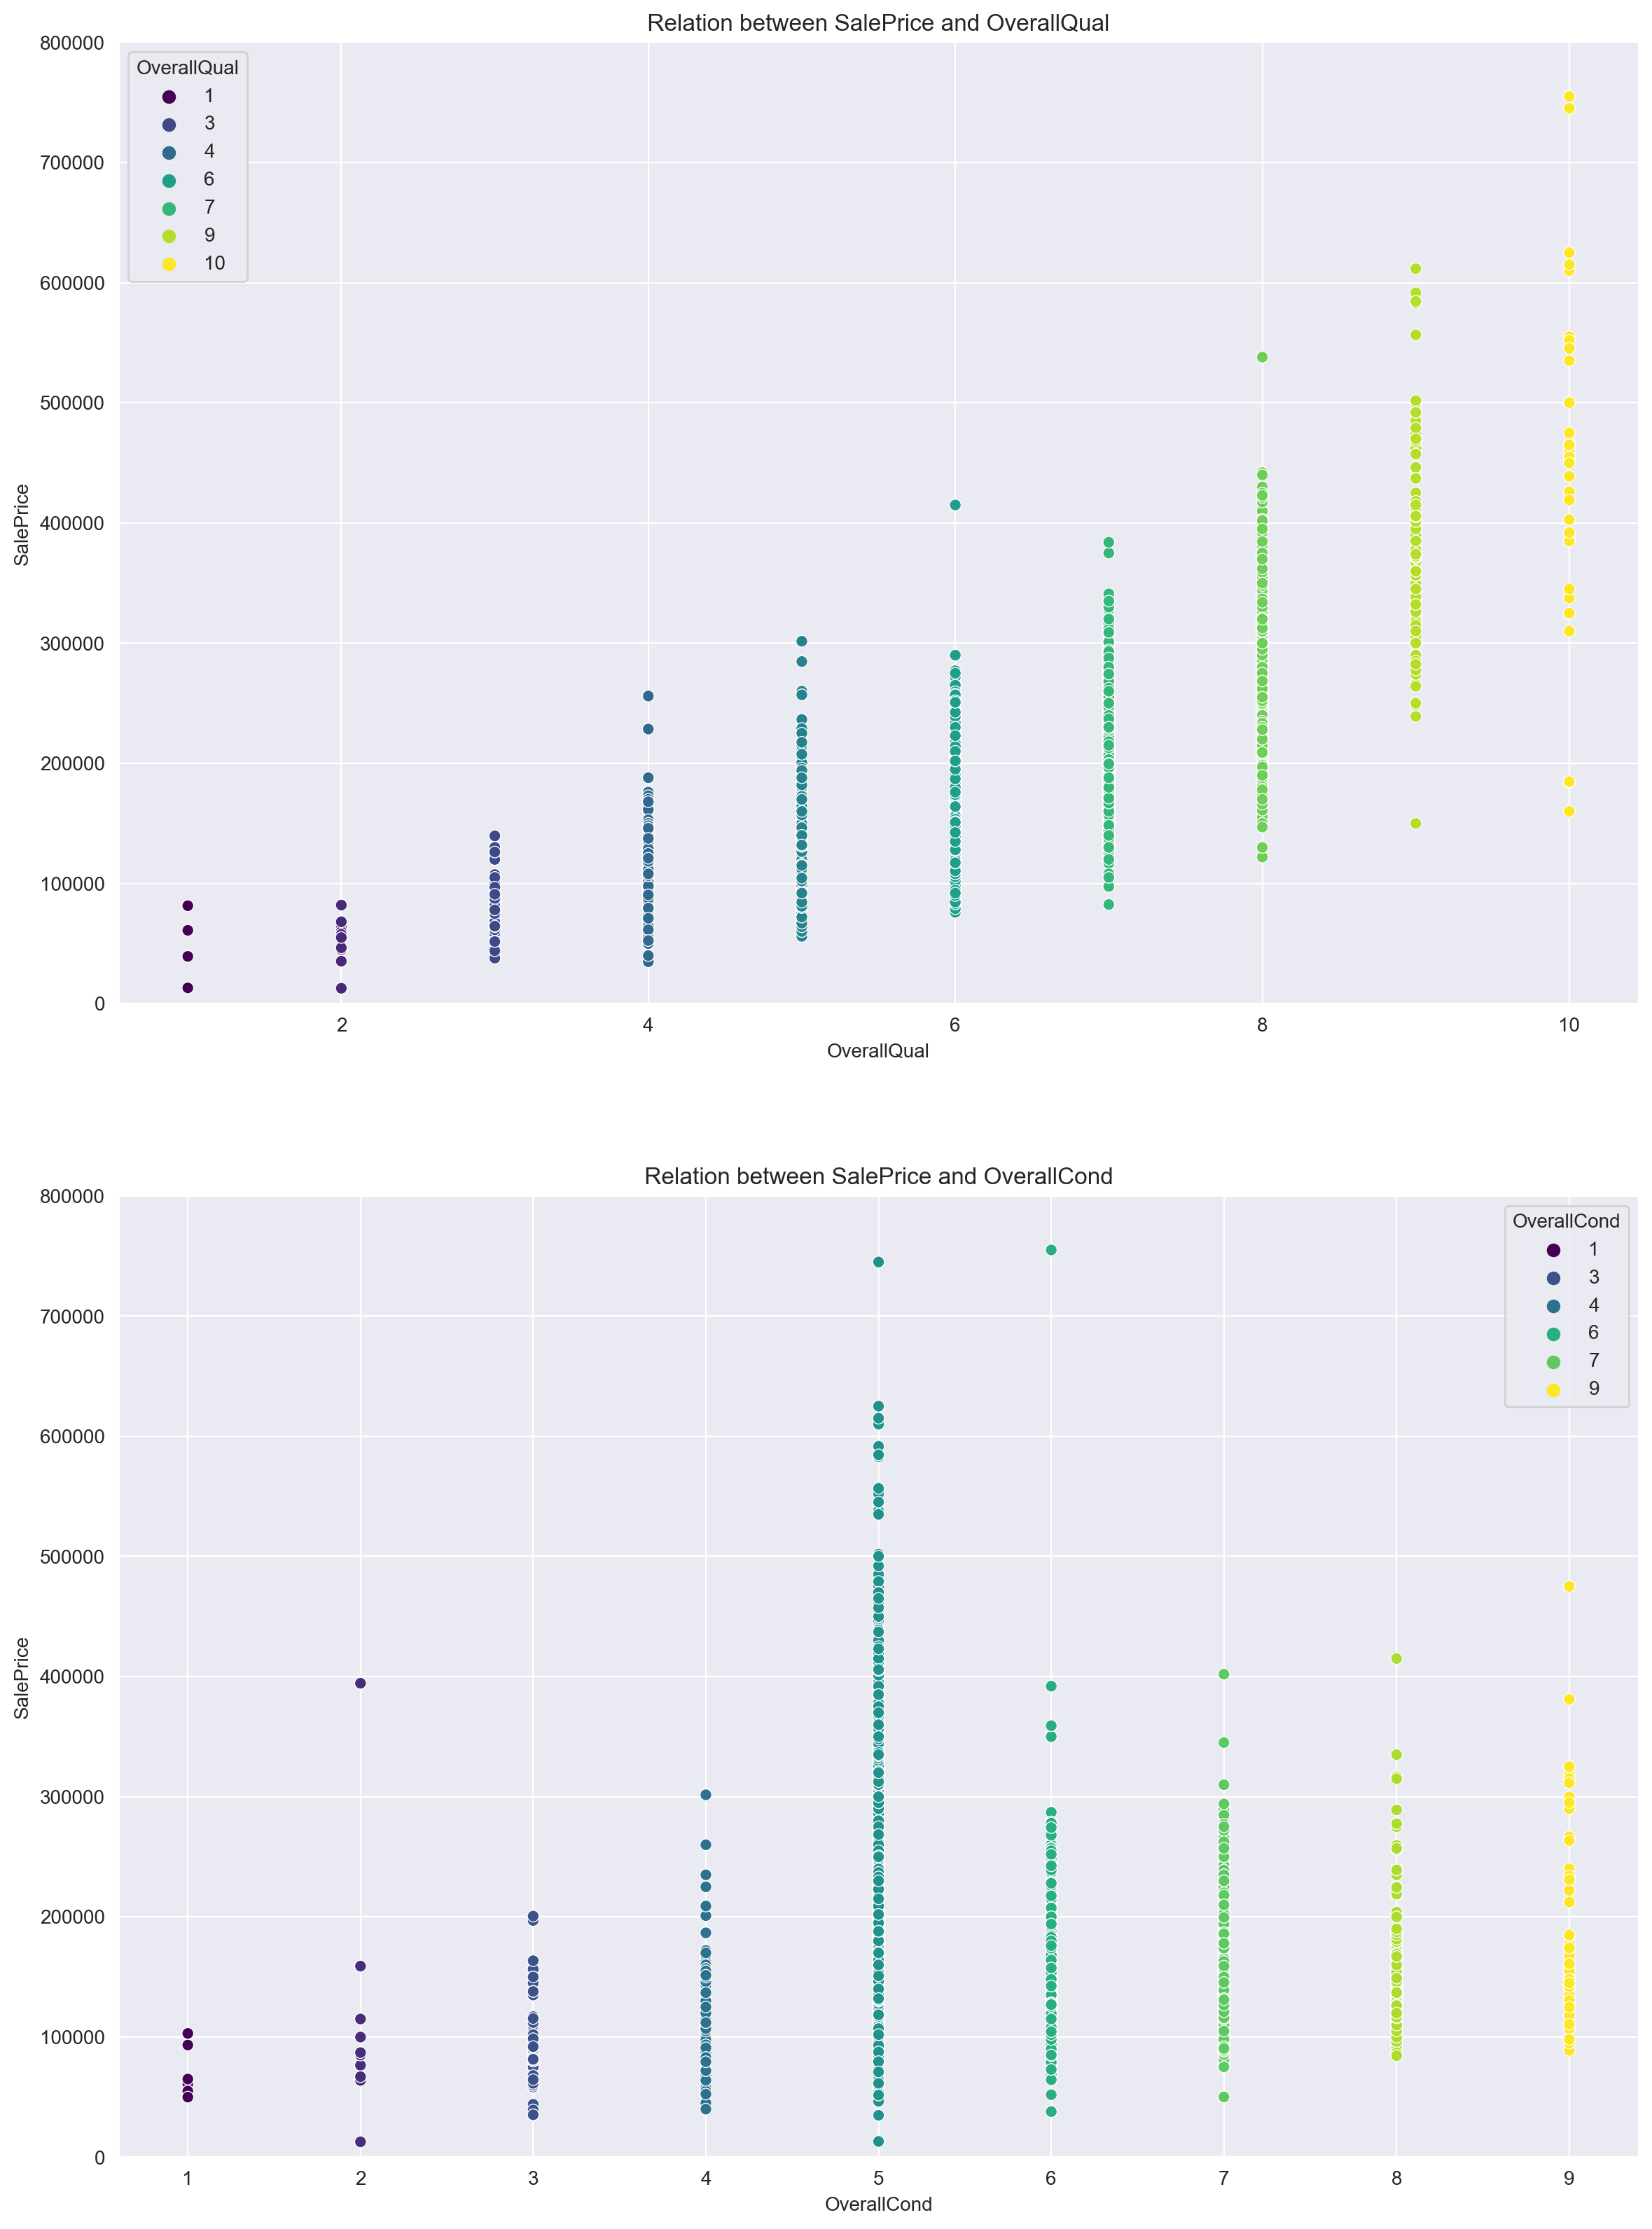

In [18]:
# setting
fig, ax = plt.subplots(2,1,figsize=(14,20),dpi=200)
cols = ['OverallQual','OverallCond']

# Overal quall/cond
for i,x in enumerate(cols):
    #plot
    sns.scatterplot(y="SalePrice", data=AmesDf, ax=ax[i], x=x, hue=x, palette='viridis')
    ax[i].set_title(f" Relation between SalePrice and {x} ")
    ax[i].set_ylim(0,800000)

As we noticed earlier, there are 2 houses with really high price, now we see they best possible quality. (so maybe the price is reasonable)

There are also points that stand out: for quality 4,5,6, maybe 7,8 or 9 we can see points that are further than the rest.
On the other hand,  a few houses with quality 9 or 10 have with really low prices.

From the charts we can see, that **OverallQual has tendency to rise with SalePrice. In OverallCond that relation isn't that clear** (mainly due to a lot of houses with high variance of prices and condition 5). Let's check year of built.

In [55]:
# with pd.option_context('display.max_columns', None): 
#     display(AmesDf[AmesDf['SalePrice']>700000])

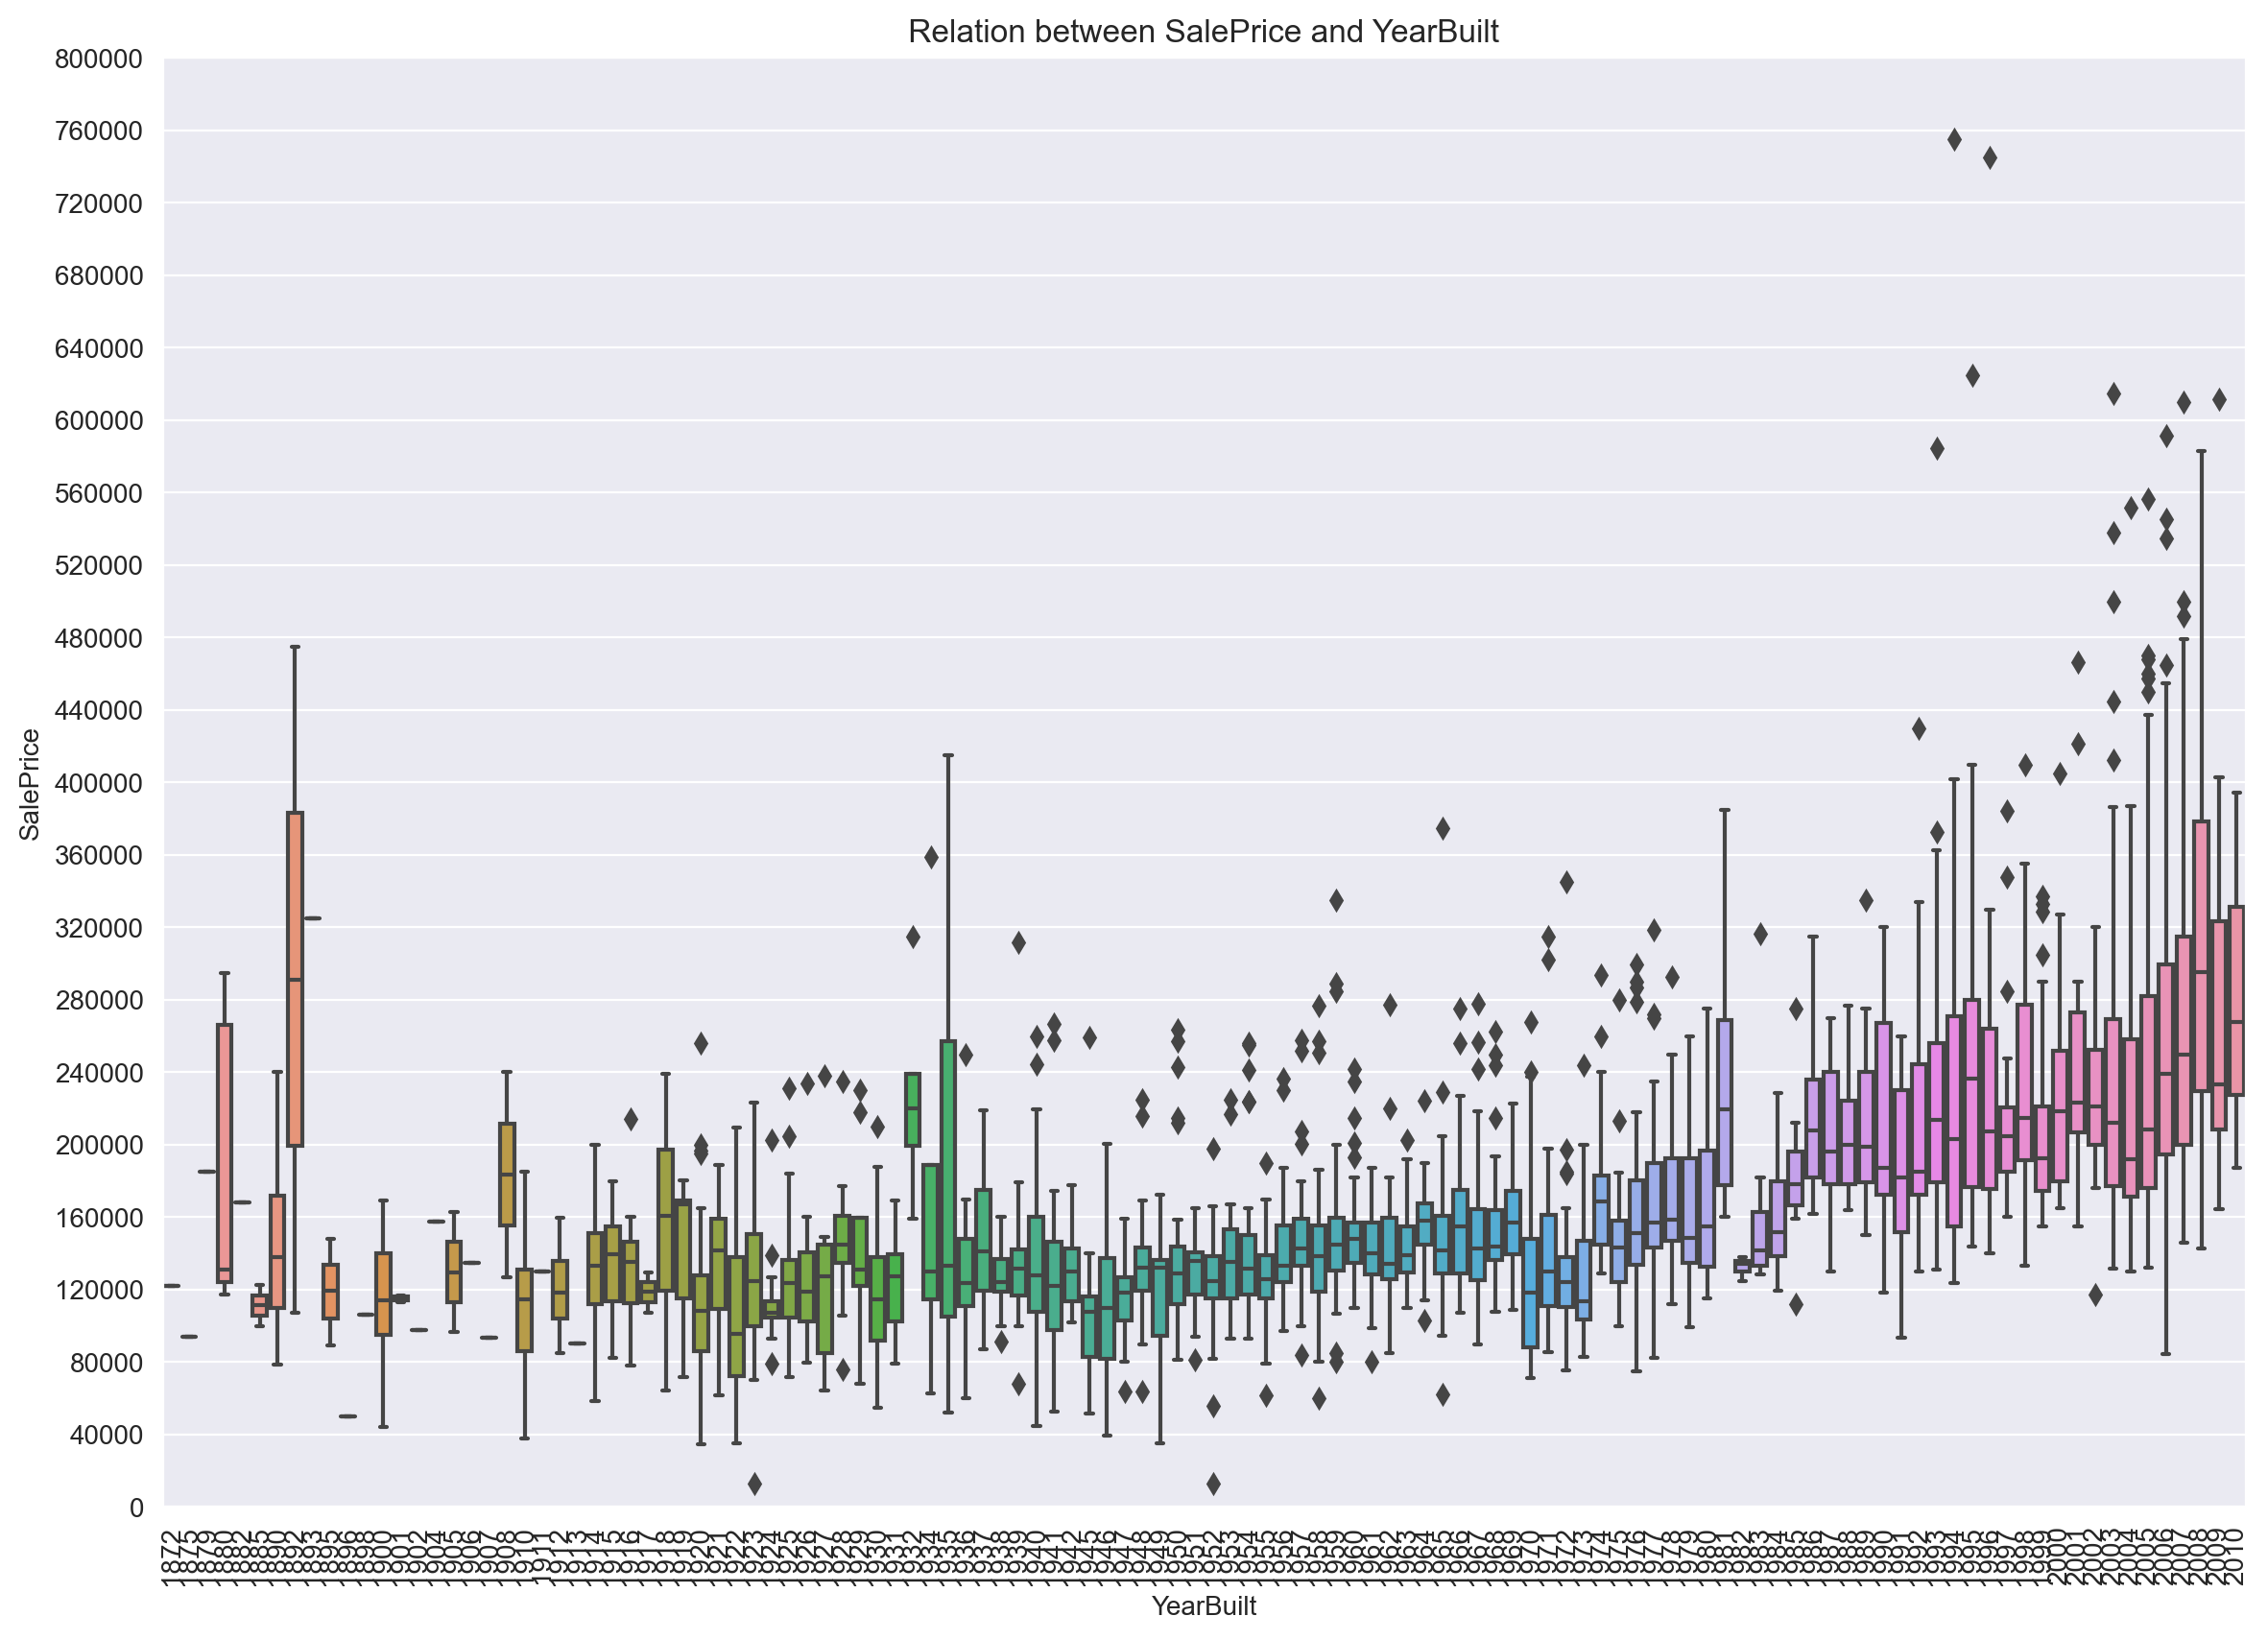

In [56]:
# YearBuilt
plt.figure(figsize=(14,10),dpi=200)
sns.boxplot(y="SalePrice", data=AmesDf, x='YearBuilt')
plt.title(f" Relation between SalePrice and YearBuilt ")
plt.ylim(0,800000)
plt.yticks(np.linspace(0,800000,21))
plt.xticks(rotation=90);

Here we can see some relation, as **generally price of house is higher for newer houses**, but there are years for which the price i really high.

In [57]:
#  might be due to very good overall quality and big living area
cols = ["SalePrice",'YearBuilt','OverallQual', 'GrLivArea']
AmesDf[AmesDf['YearBuilt']<1900].sort_values("SalePrice", ascending=False).loc[:,cols].head(7)

,SalePrice,YearBuilt,OverallQual,GrLivArea
2666,475000,1892,10,3608
1320,325000,1893,10,2775
1306,295000,1880,7,3493
716,265979,1880,7,2640
185,240000,1890,8,2268
1997,185000,1879,7,2454
1322,184000,1890,7,2495


Now let's check living area **(GrLivArea).**

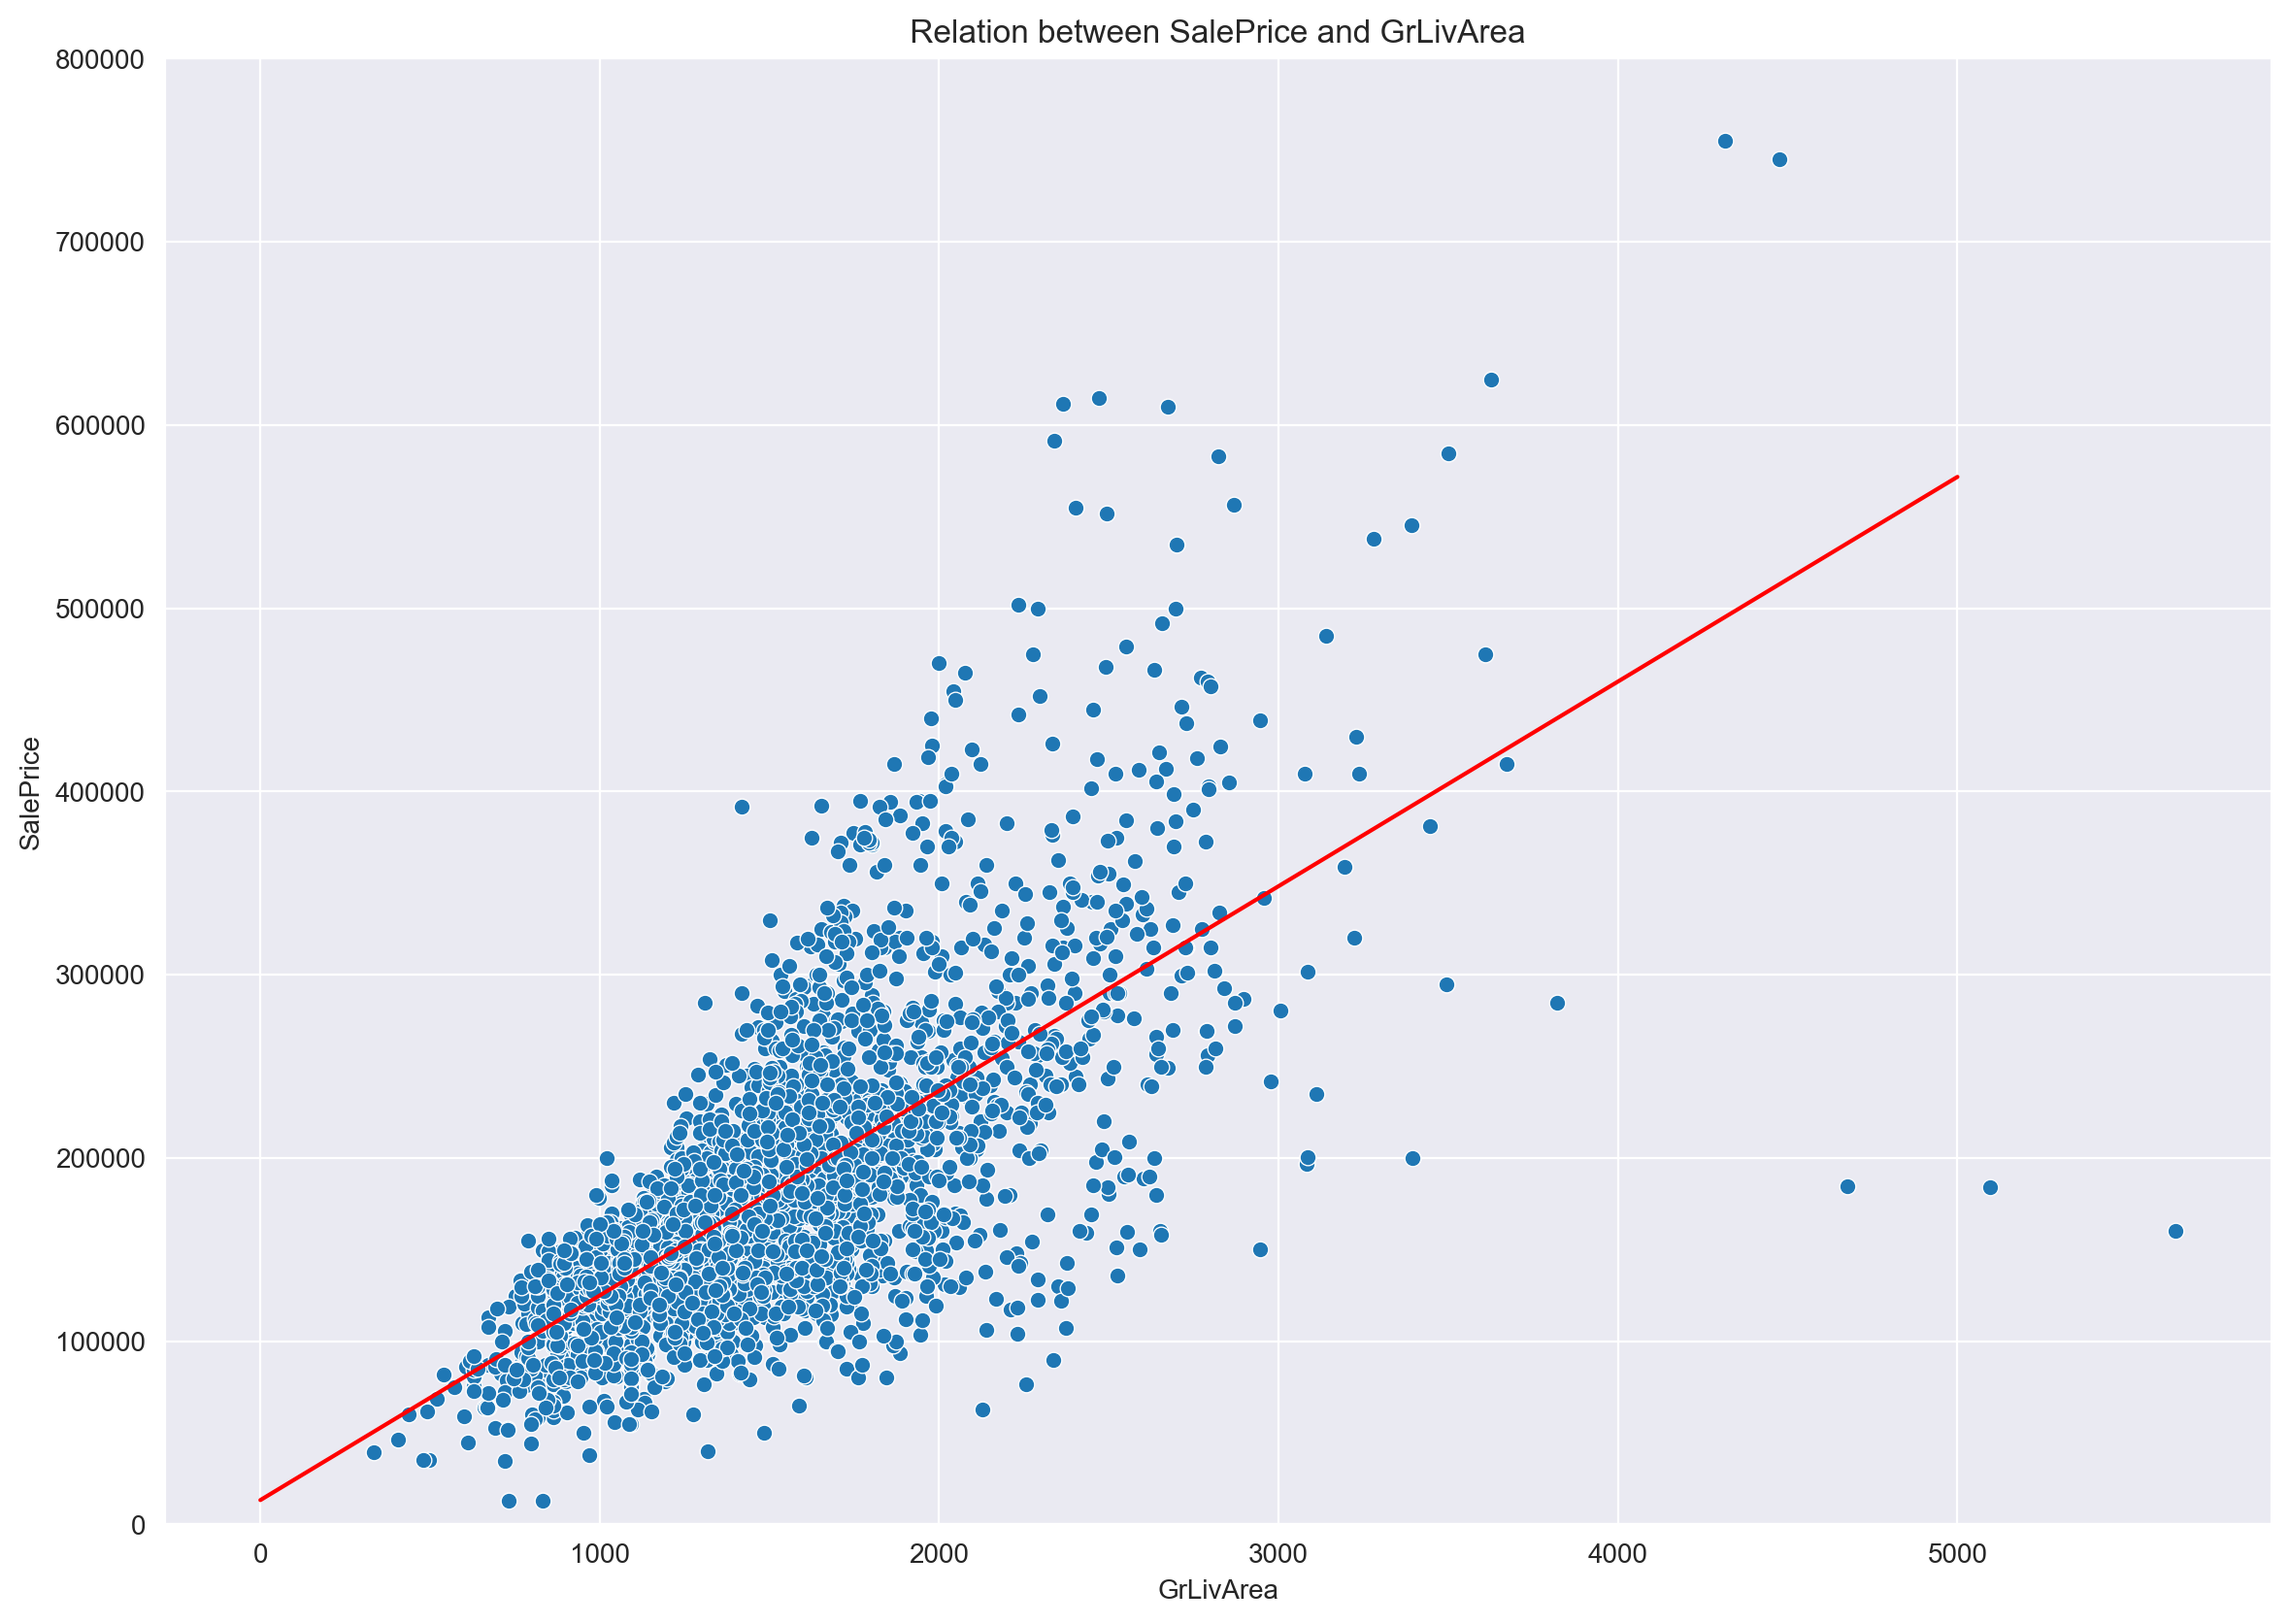

In [59]:
# Living area
# fit
m,b = np.polyfit(AmesDf["GrLivArea"], AmesDf['SalePrice'], 1)
# coefs
X_plot = np.linspace(0, 5000, 100)
Y_plot = m*X_plot+b
# plot
plt.figure(figsize=(14,10),dpi=200)
sns.scatterplot(y="SalePrice", data=AmesDf, x='GrLivArea')
plt.title(f" Relation between SalePrice and GrLivArea ")
plt.ylim(0,800000)
plt.plot(X_plot, Y_plot, color='r');

Clearly there's a relation between SalePrice and GrLivArea. Due to the fact, that SalePrice is right-skewed and we need to transform it, final dependence might be even simpler. We can also notice a few outliers around 5000 of GrLivArea.

In [60]:
AmesDf[(AmesDf['GrLivArea']>4000)].loc[:,::-1]

,SalePrice,SaleCondition,SaleType,YrSold,MoSold,MiscVal,MiscFeature,Fence,PoolQC,PoolArea,...,LotConfig,Utilities,LandContour,LotShape,Alley,Street,LotArea,LotFrontage,MSZoning,MSSubClass
1498,160000,Partial,New,2008,1,0,NaN,NaN,Gd,480,...,Corner,AllPub,Bnk,IR3,NaN,Pave,63887,313.0,RL,60
1760,745000,Abnorml,WD,2007,7,0,NaN,MnPrv,Ex,555,...,Corner,AllPub,Lvl,IR1,NaN,Pave,15623,160.0,RL,60
1767,755000,Normal,WD,2007,1,0,NaN,NaN,NaN,0,...,Corner,AllPub,Lvl,IR1,NaN,Pave,21535,104.0,RL,60
2180,183850,Partial,New,2007,10,17000,Elev,NaN,NaN,0,...,Inside,AllPub,Bnk,IR1,NaN,Pave,39290,128.0,RL,20
2181,184750,Partial,New,2007,10,0,NaN,NaN,NaN,0,...,Inside,AllPub,Bnk,IR1,NaN,Pave,40094,130.0,RL,60


It's noticible, that this 3 houses has SaleCondition = Partial, which means that home was not completed when last assessed (associated with New Homes). It means that maybe if they are finished, the price will go up.

### Quick summary
As at the beggining we made some assumptions, that selected features will be important. 

* **OverallQual** has clearer and stronger relationship with SalePrice then **OverallCond**;
* **YearBuilt** seems to be related with price;
* **GrLivArea**  looks to be in positive linear relation with price.

There might be some outliers in the dataset, but we'll make check that later.
With that knowledge, let's start checking the correlated features and their distributions.

# 3. Exploring dependent variables

First and probably the simplest way to check relation between features is to plot a correlation matrix between them.

In [ ]:
# correlation matrix
Cormat = AmesDf.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(Cormat, vmax=.8, square=True, linewidths=.1,cmap='viridis');

It seems like all "Garage" features are strongly correlated, which leads to multicollinearity (Garage features have high correlation with SalePrice and between each other). We should probably remove some of this features to avoid reducion of precision of regression model.

Similar situation between:
* YearBuilt and GarageYrBlt (probably most houses were built with garage)
* YearBuilt and YearRemod/Add (remodel date is same as construction date if no remodeling or additions)
* GrLivArea and TotRmsAbvGrd (Total rooms above grade (does not include bathrooms, GrLivArea does))


In [ ]:
# matrix of SalePrice correlation 
SpCorr = Cormat['SalePrice'].sort_values(ascending=False)
SpCorr

In [ ]:
# we select features with absolute correlation higher that 0.5, so we can make a matrix of highly correlated features
cols = abs(Cormat[Cormat['SalePrice']>0.5])['SalePrice'].sort_values(ascending=False).index
print(f'Names of columns befpre dropping:\n{cols}')
# we drop GarageYrBlt and YearRemod/Add, as the YearBuilt is there. 
# we drop GarageArea because of having GarageCars and 1stFlrSF because we have GrLivArea
cols1 = cols.drop(['GarageYrBlt','GarageArea','1stFlrSF','YearRemod/Add'])
print(f'Names of columns after dropping:\n{cols1}')

In [ ]:
# Matrix of corelations for a selected columns
CormatShort  = Cormat[Cormat.index.isin(cols)][cols].sort_index(ascending=True)
CormatShort = CormatShort.reindex(sorted(CormatShort.columns), axis=1)

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(CormatShort, square=True, linewidths=1, annot=True, cmap='viridis');

Following early assumptions, selected features (**OverallQual,YearBuilt,GrLivArea**) are correlated with price strongly.

Also we can see that SalePrice has correlation with:
* GarageCars;
* GarageArea;
* TotalBmntSF - total square footage of basement;
* 1stFlrSF - square footage of first floor; 
* FullBath - number of full baths.

**Let's plot some of this relations**

In [ ]:
# pairplot
sns.set(font_scale = 2)
sns.pairplot(AmesDf[cols1], diag_kind="kde", height=3)
plt.show();
sns.set(font_scale = 1)
# We can see, that:
# - features describing area has similar relation to sale price - especially basement area and 1st floor
# - price rise with better overal quallity
# - newer houses has higher prices
# - to a certain amount, more garages means higher price.
# - more bathrooms also on average means higher price
# We can also notice the outlier which we'll exactly detect later

## Data


In [ ]:
df = pd.read_csv("../DATA/Ames_outliers_removed.csv")

In [ ]:
df.head()

## Observing NaN Features

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
100* df.isnull().sum() / len(df)

In [ ]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category. 

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!

## Working based on Rows Missing Data

## Filling in Data or Dropping Data?

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

## Example of Filling in Data : Basement Columns

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

Let's drop or fill the rows based on this data. You could either manually fill in the data (especially the Basement data based on the description text file) OR you could simply drop the row and not consider it. Watch the video for a full explanation of this, in reality it probably makes more sense to fill in the Missing Basement data since its well described in the text description.

In [ ]:
# Could also imply we should ex
percent_nan[percent_nan < 1]

In [ ]:
100/len(df)

In [ ]:
df[df['Total Bsmt SF'].isnull()]

In [ ]:
df[df['Bsmt Half Bath'].isnull()]

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

In [ ]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [ ]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Dropping Rows

A few of these features appear that it is just one or two rows missing the data. Based on our description .txt file of the dataset, we could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [ ]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Mas Vnr Feature 

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [ ]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

### Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [ ]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

In [ ]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [ ]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [ ]:
percent_nan.index

In [ ]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

In [ ]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Filling in Fireplace Quality based on Description Text

In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [ ]:
df['Neighborhood'].unique()

In [ ]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

## Impute Missing Data based on other Features

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [ ]:
df.groupby('Neighborhood')['Lot Frontage']

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

## Transform Column

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [ ]:
df.head()['Lot Frontage']

In [ ]:
df[df['Lot Frontage'].isnull()]

In [ ]:
df.iloc[21:26]['Lot Frontage']

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan

Great! We no longer have any missing data in our entire data set! Keep in mind, we should eventually turn all these transformations into an easy to use function. For now, lets' save this dataset:

In [ ]:
df.to_csv("../DATA/Ames_NO_Missing_Data.csv",index=False)

----